In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
data = pd.read_csv('../../data/combined/combined_industry14_mean.csv')

In [257]:
google = data.copy()
# for google 
google.drop(columns=['Unnamed: 0', 'industry_group', 'ghg_change_real_cat_next'], inplace=True)

In [258]:
google['split'] = 0


# if data[data['year'] < 2021] set split to TRAIN
google.loc[google['year'] < 2021, 'split'] = 'TRAIN'
# if data[data['year'] == 2021] set split to TEST
google.loc[google['year'] == 2021, 'split'] = 'TEST'
# if data[data['year'] == 2021] set split to VALIDATION
google.loc[google['year'] == 2020, 'split'] = 'VALIDATION'

In [259]:
google.to_csv('../../data/combined/combined_industry14_mean_google.csv')

In [260]:
industry = data['industry_group']

In [261]:
data[['year', 'ghg_change_real']]

year  ghg_change_real
0    2011.0        -2.941957
1    2012.0        -3.509796
2    2013.0        -3.451964
3    2014.0        -3.469455
4    2015.0        -3.223750
..      ...              ...
132  2013.0        -3.052319
133  2014.0        -2.768652
134  2015.0        -3.877006
135  2016.0        -3.738756
136  2017.0        -3.101913

[137 rows x 2 columns]

In [262]:
data.shape

(137, 130)

In [263]:
data.tail(20)

year    Unnamed: 0  proportion_verified_scope1  \
117  2020.0  12674.738806                   92.789179   
118  2021.0  13400.048359                   93.200345   
119  2011.0   8588.166667                   96.666667   
120  2012.0   9784.292683                  100.000000   
121  2013.0  11136.777778                   97.777778   
122  2014.0  10122.276596                   84.851064   
123  2015.0  10806.346939                   91.693878   
124  2016.0  10628.173077                   92.326923   
125  2017.0  10022.472727                   89.036364   
126  2018.0  10908.070175                   88.649123   
127  2019.0  10452.725806                   92.161290   
128  2020.0  11623.400000                   96.357143   
129  2021.0  12906.963415                   94.000000   
130  2011.0   9770.584527                   95.415473   
131  2012.0  10268.800000                   94.831461   
132  2013.0  10581.554435                   92.741935   
133  2014.0  10990.193853                   86.063830   
134  2015.0  11017.025478                   89.000000   
135  2016.0  11114.645161                   85.152074   
136  2017.0  13310.226087                   86.478261   

     proportion_verified_scope2  ghg_verification_scope1_no data  \
117                   97.014925                         0.014925   
118                   96.718480                         0.025907   
119                   96.666667                         0.000000   
120                  100.000000                         0.000000   
121                   97.777778                         0.022222   
122                   87.659574                         0.000000   
123                   98.448980                         0.020408   
124                   98.076923                         0.019231   
125                   98.181818                         0.018182   
126                   98.245614                         0.035088   
127                   98.387097                         0.016129   
128                  100.000000                         0.014286   
129                   97.560976                         0.000000   
130                   95.415473                         0.074499   
131                   94.831461                         0.065169   
132                   92.741935                         0.066532   
133                   87.023641                         0.063830   
134                   86.840764                         0.035032   
135                   94.470046                         0.041475   
136                   95.652174                         0.043478   

     ghg_verification_scope1_yes  ghg_verification_scope2_no data  \
117                     0.725746                         0.011194   
118                     0.734024                         0.013817   
119                     0.633333                         0.000000   
120                     0.804878                         0.024390   
121                     0.711111                         0.044444   
122                     0.808511                         0.021277   
123                     0.775510                         0.020408   
124                     0.711538                         0.038462   
125                     0.745455                         0.018182   
126                     0.719298                         0.017544   
127                     0.790323                         0.016129   
128                     0.728571                         0.014286   
129                     0.756098                         0.024390   
130                     0.515759                         0.077364   
131                     0.559551                         0.071910   
132                     0.542339                         0.074597   
133                     0.574468                         0.061466   
134                     0.624204                         0.044586   
135                     0.580645                         0.032258   


In [264]:
data.drop(columns=['Unnamed: 0', 'industry_group'], inplace=True)

In [265]:
data['industry14_Hospitality'].mean()

0.08029197080291971

**Simple Random Forest**

In [266]:
train_data = data[data['year'] < 2021].drop(columns=['ghg_change_real_cat_next'])
test_data = data[data['year'] == 2021].drop(columns=['ghg_change_real_cat_next'])


X_train = train_data.drop(columns=['ghg_change_real_next', 'ghg_change_real_cat', 'ghg_change_total'])
X_test = test_data.drop(columns=['ghg_change_real_next', 'ghg_change_real_cat', 'ghg_change_total'])
y_train = train_data['ghg_change_real_next']
y_test = test_data['ghg_change_real_next']

In [267]:
test_data

year  proportion_verified_scope1  proportion_verified_scope2  \
10   2021.0                   94.794118                   99.019608   
21   2021.0                   91.951613                   99.193548   
32   2021.0                   94.000000                  100.000000   
43   2021.0                   98.571429                  100.000000   
54   2021.0                   96.145349                   98.255814   
65   2021.0                   88.732014                   94.604317   
76   2021.0                   91.939163                   97.718631   
96   2021.0                   92.753846                   98.461538   
107  2021.0                   94.248408                   96.815287   
118  2021.0                   93.200345                   96.718480   
129  2021.0                   94.000000                   97.560976   

     ghg_verification_scope1_no data  ghg_verification_scope1_yes  \
10                          0.009804                     0.715686   
21                          0.000000                     0.750000   
32                          0.000000                     0.886076   
43                          0.000000                     0.628571   
54                          0.017442                     0.808140   
65                          0.023381                     0.642086   
76                          0.007605                     0.806084   
96                          0.000000                     0.876923   
107                         0.012739                     0.694268   
118                         0.025907                     0.734024   
129                         0.000000                     0.756098   

     ghg_verification_scope2_no data  ghg_verification_scope2_yes  \
10                          0.009804                     0.715686   
21                          0.032258                     0.725806   
32                          0.012658                     0.784810   
43                          0.000000                     0.628571   
54                          0.017442                     0.796512   
65                          0.025180                     0.634892   
76                          0.003802                     0.771863   
96                          0.015385                     0.738462   
107                         0.006369                     0.687898   
118                         0.013817                     0.739206   
129                         0.024390                     0.634146   

     ghg_verification_scope3_no data  ghg_verification_scope3_yes  \
10                          0.137255                     0.500000   
21                          0.112903                     0.532258   
32                          0.151899                     0.506329   
43                          0.085714                     0.428571   
54                          0.058140                     0.656977   
65                          0.138489                     0.476619   
76                          0.129278                     0.562738   
96                          0.076923                     0.553846   
107                         0.076433                     0.573248   
118                         0.060449                     0.663212   
129                         0.121951                     0.500000   

     type_scope1_limited  ...  investment_total_log1p  \
10              0.519608  ...                9.676401   
21              0.548387  ...               10.489014   
32              0.518987  ...               10.764420   
43              0.400000  ...               10.543939   
54              0.581395  ...               10.367483   
65              0.410072  ...               10.028744   
76              0.505703  ...               11.145583   
96              0.538462  ...               12.185114   
107             0.541401  ...                9.636994   
118             0.528497  ...                8.844050   
129             0.414634  ...           

In [268]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


Random Forest
MSE:  1.3927312656457729
MAE:  0.8036644613495683
R2:  0.5466891382949843


In [286]:
# print predictions and actual values alongside
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_pred = pd.concat([y_pred, y_test], axis=1)
y_simple = data.loc[data['year'] == 2022]['ghg_change_real']
y_simple = pd.DataFrame(y_simple).reset_index(drop=True)
y_pred = pd.concat([y_pred, y_simple], axis=1)
y_pred

pred  ghg_change_real_next  ghg_change_real
0   -5.222753             -6.028190              NaN
1   -5.430257             -4.662287              NaN
2   -4.130916             -3.019181              NaN
3   -1.928956             -0.493971              NaN
4   -5.433280             -4.962485              NaN
5   -5.112803             -4.803082              NaN
6   -4.363753             -4.002030              NaN
7   -4.699540             -4.015243              NaN
8   -6.288977             -5.820095              NaN
9   -7.001877             -7.264714              NaN
10  -4.044331             -2.684916              NaN
20        NaN                   NaN              NaN
31        NaN                   NaN              NaN
42        NaN                   NaN              NaN
53        NaN                   NaN              NaN
64        NaN                   NaN              NaN
75        NaN                   NaN              NaN
95        NaN                   NaN              NaN
106       NaN                   NaN              NaN
117       NaN                   NaN              NaN
128       NaN                   NaN              NaN

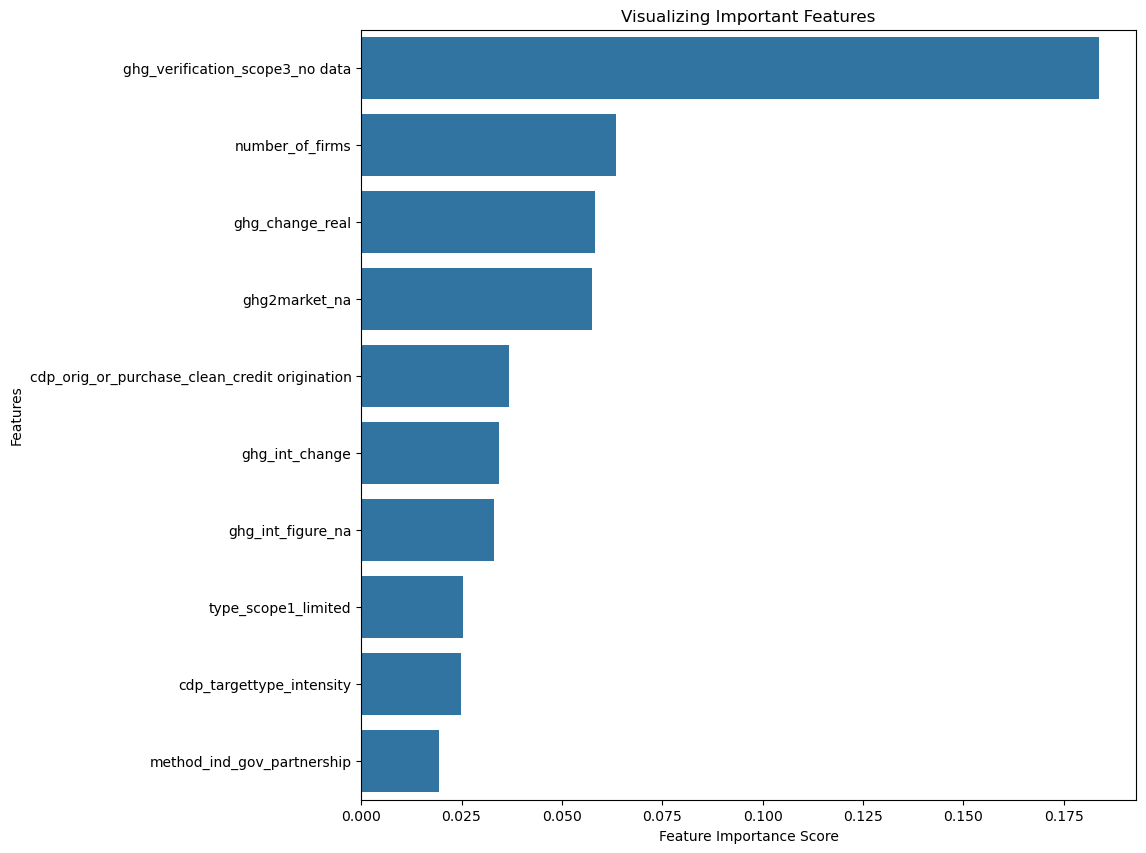

In [130]:
# feature importance plot of top 10 features of best estimator
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances.importance[:10], y=feature_importances.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()



In [131]:
feature_importances.head(20)

importance
ghg_verification_scope3_no data                  0.183867
number_of_firms                                  0.063413
ghg_change_real                                  0.058306
ghg2market_na                                    0.057592
cdp_orig_or_purchase_clean_credit origination    0.036742
ghg_int_change                                   0.034228
ghg_int_figure_na                                0.033183
type_scope1_limited                              0.025427
cdp_targettype_intensity                         0.024994
method_ind_gov_partnership                       0.019498
ghg_verification_scope3_yes                      0.018901
method_ind_MACC                                  0.018355
cdp_risk_transition                              0.016281
methane_emissions                                0.015128
cdp_lowcarbon_rev_total_missing                  0.011872
ghg_change_nonzero_count                         0.011536
investment_counter                               0.011411
co2_counter                                      0.011331
cdp_risk_physical                                0.010792
ghg1                                             0.010621

**Random Forest with Cross Validation**

In [132]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

# random forest with cross validation and gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'max_depth': [None, 2, 5, 10, 20, 50, 100, 200]}
scoring = {'mse': make_scorer(mean_squared_error),
              'mae': make_scorer(mean_absolute_error),
              'r2': make_scorer(r2_score)}

# grid search with time series cross validation
grid_search = GridSearchCV(rf, parameters, cv=tscv, scoring=scoring, refit='mse', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_
grid_search.cv_results_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=300; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.5s
[CV] END ...................max_depth=None, n_estimators=400; total time=   0.5s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.8s
[CV] END .......................max_depth=2, n_

{'mean_fit_time': array([0.12147164, 0.2413667 , 0.51019796, 0.77509785, 1.02620435,
        1.25920129, 0.06642183, 0.10819991, 0.24866851, 0.33090329,
        0.43300939, 0.56025926, 0.10017403, 0.19273194, 0.40113672,
        0.56670372, 0.77053936, 1.10349337, 0.12094235, 0.22874792,
        0.47382927, 0.90818969, 1.20067104, 1.36272089, 0.17864291,
        0.33782895, 0.63726838, 0.78375761, 0.96741048, 1.251712  ,
        0.12285074, 0.25273895, 0.51995905, 0.76996366, 0.96058027,
        1.17524727, 0.1176815 , 0.25745797, 0.47014332, 0.71726123,
        0.92779978, 1.14680036, 0.12087623, 0.23645735, 0.43978834,
        0.70490321, 0.85349266, 0.95201079]),
 'std_fit_time': array([0.03680464, 0.10048786, 0.211999  , 0.29232408, 0.40886585,
        0.45790984, 0.01370514, 0.01733295, 0.04882898, 0.0873328 ,
        0.0889674 , 0.1593078 , 0.03690183, 0.04687046, 0.13542684,
        0.18967904, 0.26392595, 0.45197477, 0.0427538 , 0.08658563,
        0.18081042, 0.30981529, 0.514

In [142]:
# best estimator
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

Random Forest
MSE:  1.8947552281742235
MAE:  0.9408378614634468
R2:  0.3832886886434006


Can I put something to improve the model like in the case of the hospitality sector? such as number of airline passengers in the world or something like that? Industry14 Hospitality is not decarbonizing fast enough.

In [121]:
X_test['industry14_Hospitality']

10     0.0
21     0.0
32     0.0
43     1.0
54     0.0
65     0.0
76     0.0
96     0.0
107    0.0
118    0.0
129    0.0
Name: industry14_Hospitality, dtype: float64

In [143]:
# print feature importances don't plot just print
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

importance
ghg_verification_scope3_no data                  0.303588
ghg_change_real                                  0.081499
number_of_firms                                  0.075278
type_scope1_limited                              0.053993
ghg_int_figure_na                                0.050077
ghg2market_na                                    0.045559
ghg_int_change                                   0.045430
cdp_orig_or_purchase_clean_credit origination    0.034866
method_ind_gov_partnership                       0.023553
cdp_targettype_intensity                         0.022842
method_ind_MACC                                  0.021779
ghg_verification_scope3_yes                      0.021284
cdp_targetduration_mean                          0.016397
ghg_change_nonzero_count                         0.015118
cdp_risk_transition                              0.012087
methane_emissions                                0.011957
cdp_lowcarbon_rev_total_missing                  0.010472
cdp_risk_physical                                0.009942
cdp_credits_cancelled_clean_missing              0.009844
method_ind_financial_opt                         0.007836

**Lasso Regression**

In [124]:
# standardize train and test data for lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
# lasso with cross validation
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
n_alphas = 20
tscv = TimeSeriesSplit(n_splits=5)
lasso = LassoCV(cv = tscv , alphas = np.logspace(-6, 3, n_alphas), max_iter=100000, n_jobs=-1).fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print('Lasso')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('Alpha: ', lasso.alpha_)

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e-02, tolerance: 1.908e-02
  model = cd_fast.enet_coordinate_descent(
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.077e-02, tolerance: 1.908e-02
  model = cd_fast.enet_coordinate_descent(
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

Lasso
MSE:  1.863516335364
MAE:  1.0412708687840178
R2:  0.393456428657442
Alpha:  0.1623776739188721


In [146]:
# print coefficients and names side by side
lasso_coef = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['coef'])

# number of zero coefficients
np.sum(lasso_coef['coef'] == 0)

# print nonzero coefficients
lasso_coef[lasso_coef['coef'] != 0].sort_values(by='coef', ascending=False)

coef
ghg_change_real                  0.252907
cdp_risk_transition              0.201894
method_ind_MACC                  0.161176
ghg_change_othergroup            0.091558
ghg1                             0.046181
ghg_verification_scope3_no data  0.038942
ghg_change_measure               0.001863
scope2                          -0.006093
number_of_firms                 -0.017181
scope3                          -0.052542
investment_counter              -0.056892
industry14_Services             -0.078062
ghg_int_figure_na               -0.101248
cdp_targettype_absolute         -0.195435

**Gradient Boosting**

In [147]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=None, random_state=0)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Performance metrics
print('XGBoost')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

XGBoost
MSE:  1.8826130923068478
MAE:  1.0093520968895524
R2:  0.38724075190840335


/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will b

In [282]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
}

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=0)

# Initialize TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fut

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [283]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Predictions with the best estimator
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Performance metrics
print('XGBoost - Tuned Model')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Best score found:  -1.3071589236781274
XGBoost - Tuned Model
MSE:  0.6897514657960422
MAE:  0.7307087763871536
R2:  0.775497370501463


In [285]:
# print predictions and actual values alongside
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_prev = data.loc[data['year'] == 2020]['ghg_change_real']
y_pred = pd.concat([y_pred, y_test, y_prev], axis=1)

y_pred

pred  ghg_change_real_next  ghg_change_real
0   -5.222753             -6.028190              NaN
1   -5.430257             -4.662287              NaN
2   -4.130916             -3.019181              NaN
3   -1.928956             -0.493971              NaN
4   -5.433280             -4.962485              NaN
5   -5.112803             -4.803082              NaN
6   -4.363753             -4.002030              NaN
7   -4.699540             -4.015243              NaN
8   -6.288977             -5.820095              NaN
9   -7.001877             -7.264714        -6.428557
10  -4.044331             -2.684916              NaN
20        NaN                   NaN        -4.396460
31        NaN                   NaN        -2.635211
42        NaN                   NaN        -2.765758
53        NaN                   NaN        -4.056420
64        NaN                   NaN        -3.911654
75        NaN                   NaN        -2.756078
95        NaN                   NaN        -3.154000
106       NaN                   NaN        -3.049527
117       NaN                   NaN        -5.934832
128       NaN                   NaN        -2.844714

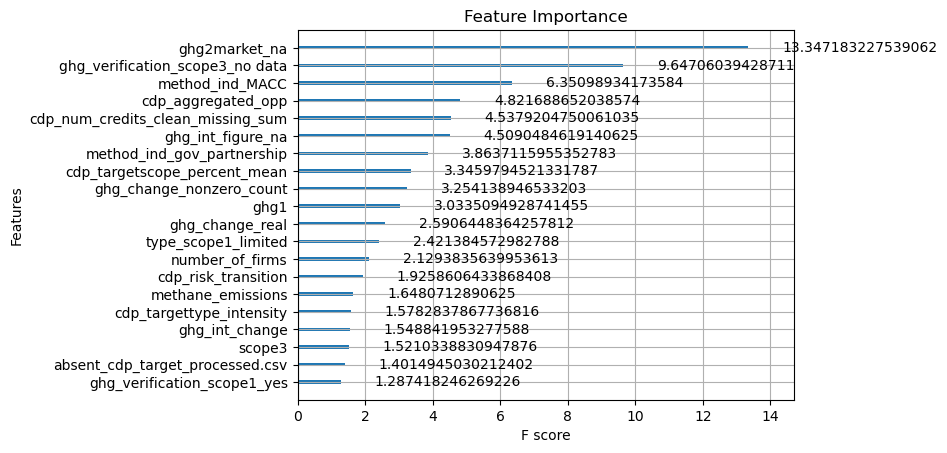

In [284]:

xgb.plot_importance(best_estimator, importance_type='gain', max_num_features=20, title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

In [279]:
print('MSE: ', mean_squared_error(y_test, X_test['ghg_change_real']))
print('MAE: ', mean_absolute_error(y_test, X_test['ghg_change_real']))
print('R2: ', r2_score(y_test, X_test['ghg_change_real']))

MSE:  0.5428204007456371
MAE:  0.627275720950281
R2:  0.8233209882748111


In [280]:
# 2021 to 2022
r2_score(y_test['ghg_change_real_next'], X_test['ghg_change_real'])

0.8233209882748111